# UCI Adult Income Dataset - Exploratory and Descriptive Analysis
This notebook is focused on the exploratory and descriptive analysis of the cleaned version of the UCI Adult income Dataset

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px

## Define and create Paths

In [5]:
# get working directory 
Current_dir = os.getcwd()
# on one directory up to the root directory 
project_root_dir = os.path.dirname(Current_dir)
# define paths to the data folders
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# define paths to result folder 
results_dir = os.path.join(project_root_dir,'results')
# define paths to docs folder 
docs_dir = os.path.join(project_root_dir,'docs')

# create directories if they do not eFileExists 
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data

In [8]:
adult_data_filename = os.path.join(processed_dir,'adult_cleaned.csv')
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north_america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north_america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,high school graduate,blue collar,north_america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north_america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central_america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north_america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central_america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,high school graduate,white collar,north_america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north_america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north_america,36-45


In [10]:
adult_df.shape

(32513, 16)

In [14]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnwgt               32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education_level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary statistics
### Numerical variables

In [17]:
adult_df.describe()

,age,fnwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Categorical Variables

In [19]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,4,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,high school graduate,white collar,north_america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


In [24]:
adult_df['workclass'].value_counts()

workclass
private          22650
government        4350
self-employed     3656
unknown           1836
voluntary           14
unemployed           7
Name: count, dtype: int64

In [26]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [28]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
Name: proportion, dtype: float64

In [30]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [32]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [40]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


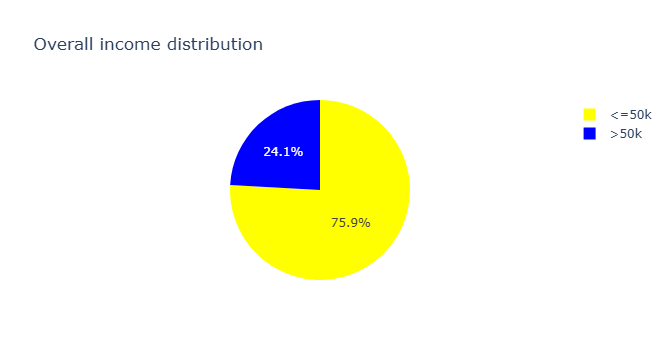

In [45]:
fig = px.pie(adult_df_income,names='income',values='total',title='Overall income distribution',color_discrete_sequence=["yellow","blue"])
fig.show()

### Income by Age Group

In [58]:
adult_df_income_age= adult_df.groupby(['age_group','income']).size().reset_index(name='total_by_age').sort_values(['age_group','income'],ascending=True)
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [68]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age'] / total_per_group * 100).round(2)
adult_df_income_age['percentage']                             

0      97.91
1       2.09
2      81.28
3      18.72
4      65.37
5      34.63
6      61.46
7      38.54
8      75.56
9      24.44
10     83.33
11     16.67
12    100.00
Name: percentage, dtype: float64

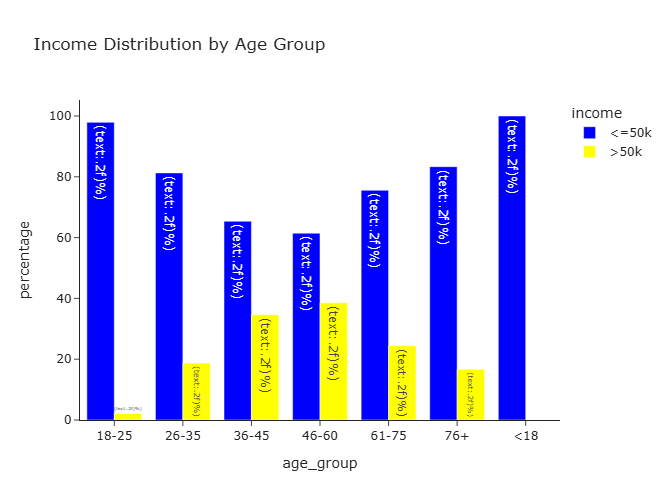

In [74]:
fig = px.bar(adult_df_income_age, 
             x= 'age_group',
             y= 'percentage',
             color='income',
             title = 'Income Distribution by Age Group',
             barmode= 'group',
             height= 500,
             color_discrete_sequence = ["blue","yellow"],
             text= 'percentage'
             
) 
fig.update_layout(template="simple_white")
fig.update_traces(texttemplate='(text:.2f)%)')
fig.show()

In [ ]:
themes = ["plotly","plotly_white","plotly_dark","ggplot2","seaborn",""]